# **Stroke Prediction - Predictive Analysis**

## **Domain**

Domain yang dipilih untuk dilakukan prediksi adalah domain kesehatan, yang berfokus pada penyakit stroke.

Menurut *World Stroke Organization* (WSO), 13 juta orang terserang stroke setiap tahunnya, dan sekitar 5,5 juta orang akan meninggal dunia. Stroke merupakan penyebab utama kematian dan disabilitas di seluruh dunia, dan itulah sebabnya mengapa dampaknya sangat serius dalam semua aspek kesehatan. Stroke tidak hanya memengaruhi pasien, tetapi juga memengaruhi lingkungan sosial, keluarga, dan tempat kerja pasien. Selain itu, berlawanan dengan kepercayaan masyarakat, stroke dapat terjadi pada siapa saja, pada usia berapa pun, tanpa memandang jenis kelamin atau kondisi fisik.

Stroke didefinisikan sebagai gangguan neurologis akut pada pembuluh darah di otak yang terjadi ketika suplai darah ke suatu area otak terhenti dan sel-sel otak kekurangan oksigen. Stroke dibagi menjadi iskemik dan hemoragik. Stroke iskemik bisa ringan hingga sangat parah dengan kerusakan sementara hingga permanen. Perdarahan jarang terjadi dan melibatkan pecahnya pembuluh darah yang mengakibatkan pendarahan otak. Stroke Iskemik, yang merupakan stroke yang paling umum, melibatkan terhentinya aliran darah ke suatu area otak akibat penyempitan atau penyumbatan arteri.

Permasalahan stroke yang signifikan ini memiliki kaitan erat dengan *machine learning*, yang dapat digunakan untuk mendeteksi, mendiagnosis, dan memprediksi risiko stroke secara lebih akurat dan cepat. Dengan menggunakan dataset yang mencakup berbagai faktor risiko seperti usia, tekanan darah, riwayat medis, gaya hidup, dan hasil pemeriksaan klinis, algoritma *machine learning* dapat dilatih untuk mengenali pola dan korelasi yang mungkin tidak terlihat oleh manusia.

Kontribusi dari penerapan *machine learning* dalam dunia kesehatan khususnya stroke sangatlah besar. Dengan model prediksi yang akurat, tenaga medis dapat mengidentifikasi pasien berisiko tinggi lebih awal dan mengambil tindakan pencegahan yang tepat, seperti perubahan gaya hidup atau terapi medis. Hal ini dapat mengurangi jumlah kasus stroke, menurunkan angka kematian, dan mengurangi beban disabilitas yang seringkali menyertai pasien stroke. Selain itu, kemampuan prediksi yang ditingkatkan juga dapat membantu dalam merancang strategi kesehatan masyarakat yang lebih efektif, mengoptimalkan sumber daya kesehatan, dan memberikan perawatan yang lebih personal dan tepat sasaran.

## **Business Understanding**
Pada bagian _Business Understanding_ akan dijelaskan mengenai permasalahan yang akan diselesaikan (*problem statements*), tujuan (*goal*), dan solusi yang diajukan (*solution statements*).

### **Problem Statements**
Bagaimana mengetahui pasien memiliki penyakit stroke berdasarkan riwayat dari variabel-variabel kesehatan yang ada?

### **Goals**
Untuk menyelesaikan permasalahan yang telah disampaikan pada bagian *Problem Statement*, maka dibuat model yang digunakan untuk memprediksi apakah seseorang memiliki penyakit stroke berdasarkan riwayat kesehatannya.

### **Solution statements**
Solusi pembuatan model yang dilakukan adalah dengan menerapkan 3 algoritma _machine learning_, terbatas pada **_K-NN_**, **_Random Forest_**, dan **_AdaBoost_**. Diterapkannya 3 algoritma tersebut bertujuan untuk mengkomparasi dan mendapatkan model atau algoritma yang memiliki tingkat _error_ yang paling kecil, sehingga prediksi penyakit stroke memiliki akurasi yang tinggi.

-  **_K-NN_**: Algoritma _K-Nearest Neighbor_ (K-NN) adalah algoritma _machine learning_ yang sederhana dan mudah diterapkan, yang mana umumnya digunakan untuk menyelesaikan masalah klasifikasi dan regresi. Algoritma ini termasuk dalam _supervised learning_. Tujuan dari algortima K-NN adalah untuk mengidentifikasi _nearest neighbor_ dari titik yang diberikan, sehingga dapat menetapkan label prediksi ke titik tersebut.

-  **_Random Forest_**: _Random forest_ adalah kombinasi dari masing – masing _tree_ atau pohon, yang kemudian dikombinasikan ke dalam satu model. _Random Forest_ bergantung pada sebuah nilai vector acak dengan distribusi yang sama pada semua pohon yang masing masing _tree_ memiliki kedalaman yang maksimal.

-  **_AdaBoost_**: _AdaBoost_ atau _Adaptive Boost_ merupakan algoritma yang memanfaatkan _bagging_ dan _boosting_ untuk meningkatkan akurasi. Sama seperti algoritma _random forest_, algoritma _AdaBoost_ juga menggunakan beberapa _decision tree_ untuk melakukan prediksi.



In [ ]:
# libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

## **Data Understanding**
Dataset yang digunakan pada proyek _machine learning_ ini merupakan **5110 data observasi** yang didapat dan diunduh dari situs [_kaggle_](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) [2]. Terdapat 11 fitur yang dapat digunakan untuk memprediksi kemungkinan penyakit stroke.

**Variabel-variabel pada Stroke Prediction Dataset adalah sebaggai berikut:**

1. _id_: pengenal identitas

2. _gender_: Jenis Kelamin pasian
    - Pria "_Male_",
    - Wanita "_Female_",
    - Lainnya "_Other_"

3. _age_: usia pasien, dalam tahun (_years_)

4. _hypertension_: 0 jika pasien tidak memiliki hipertensi, 1 jika pasien memiliki hipertensi

5. _heart_disease_: 0 jika pasien tidak memiliki penyakit jantung, 1 jika pasien memiliki penyakit jantung

6. _ever_married_: Status Pernikahan,
    - Belum Menikah "_No_",
    - Sudah Menikah "_Yes_"

7. _work_type_: Jenis Pekerjaan
    - Masih anak kecil "_children_",
    - Pemerintahan "_Govt_jov_",
    - Tidak bekerja "_Never_worked_",
    - Swasta "_Private_",
    - Wiraswasta "_Self-employed_"

8. _Residence_type_: Jenis Tempat Tinggal
    - Perdesaan "_Rural_",
    - Perkotaan "_Urban_"

9. _avg_glucose_level_: kadar glukosa rata-rata dalam darah

10. _bmi_: indeks massa tubuh "_body max index_"

11. _smoking_status_: Status perokok
    - Sebelumnya perokok "_formerly smoked_",
    - Tidak pernah merokok "_never smoked_",
    - Perokok "_smokes_"
    - Tidak diketahui "_Unknown_"*

12. _stroke_: 1 jika pasien mengalami stroke atau 0 jika tidak

*Catatan: "_Unknown_" dalam _status_smoking_ berarti informasi tersebut tidak tersedia untuk pasien ini

In [ ]:
# load the dataset
stroke_prediction = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
stroke_prediction

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## **Exploratory Data Analysis**

In [ ]:
# mendapatkan informasi dari dataset
stroke_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Dari informasi yang didapatkan, disimpulkan terdapat 11 fitur pada data _stroke prediction_, yang mana memiliki 8 fitur _categorical_ dan 3 fitur _numerical_.

_Categorical_ fitur di antaranya adalah _`gender`_, _`hypertension`_, _`heart_disease`_, _`ever_married`_, _`work_type`_, _`Residence-type`_, _`smoking_status_`, dan _`stroke`_.

_Numerical_ fitur di antaranya adalah _`age`_, _`avg_glucose_level`_, dan _`bmi`_.

In [ ]:
stroke_prediction.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


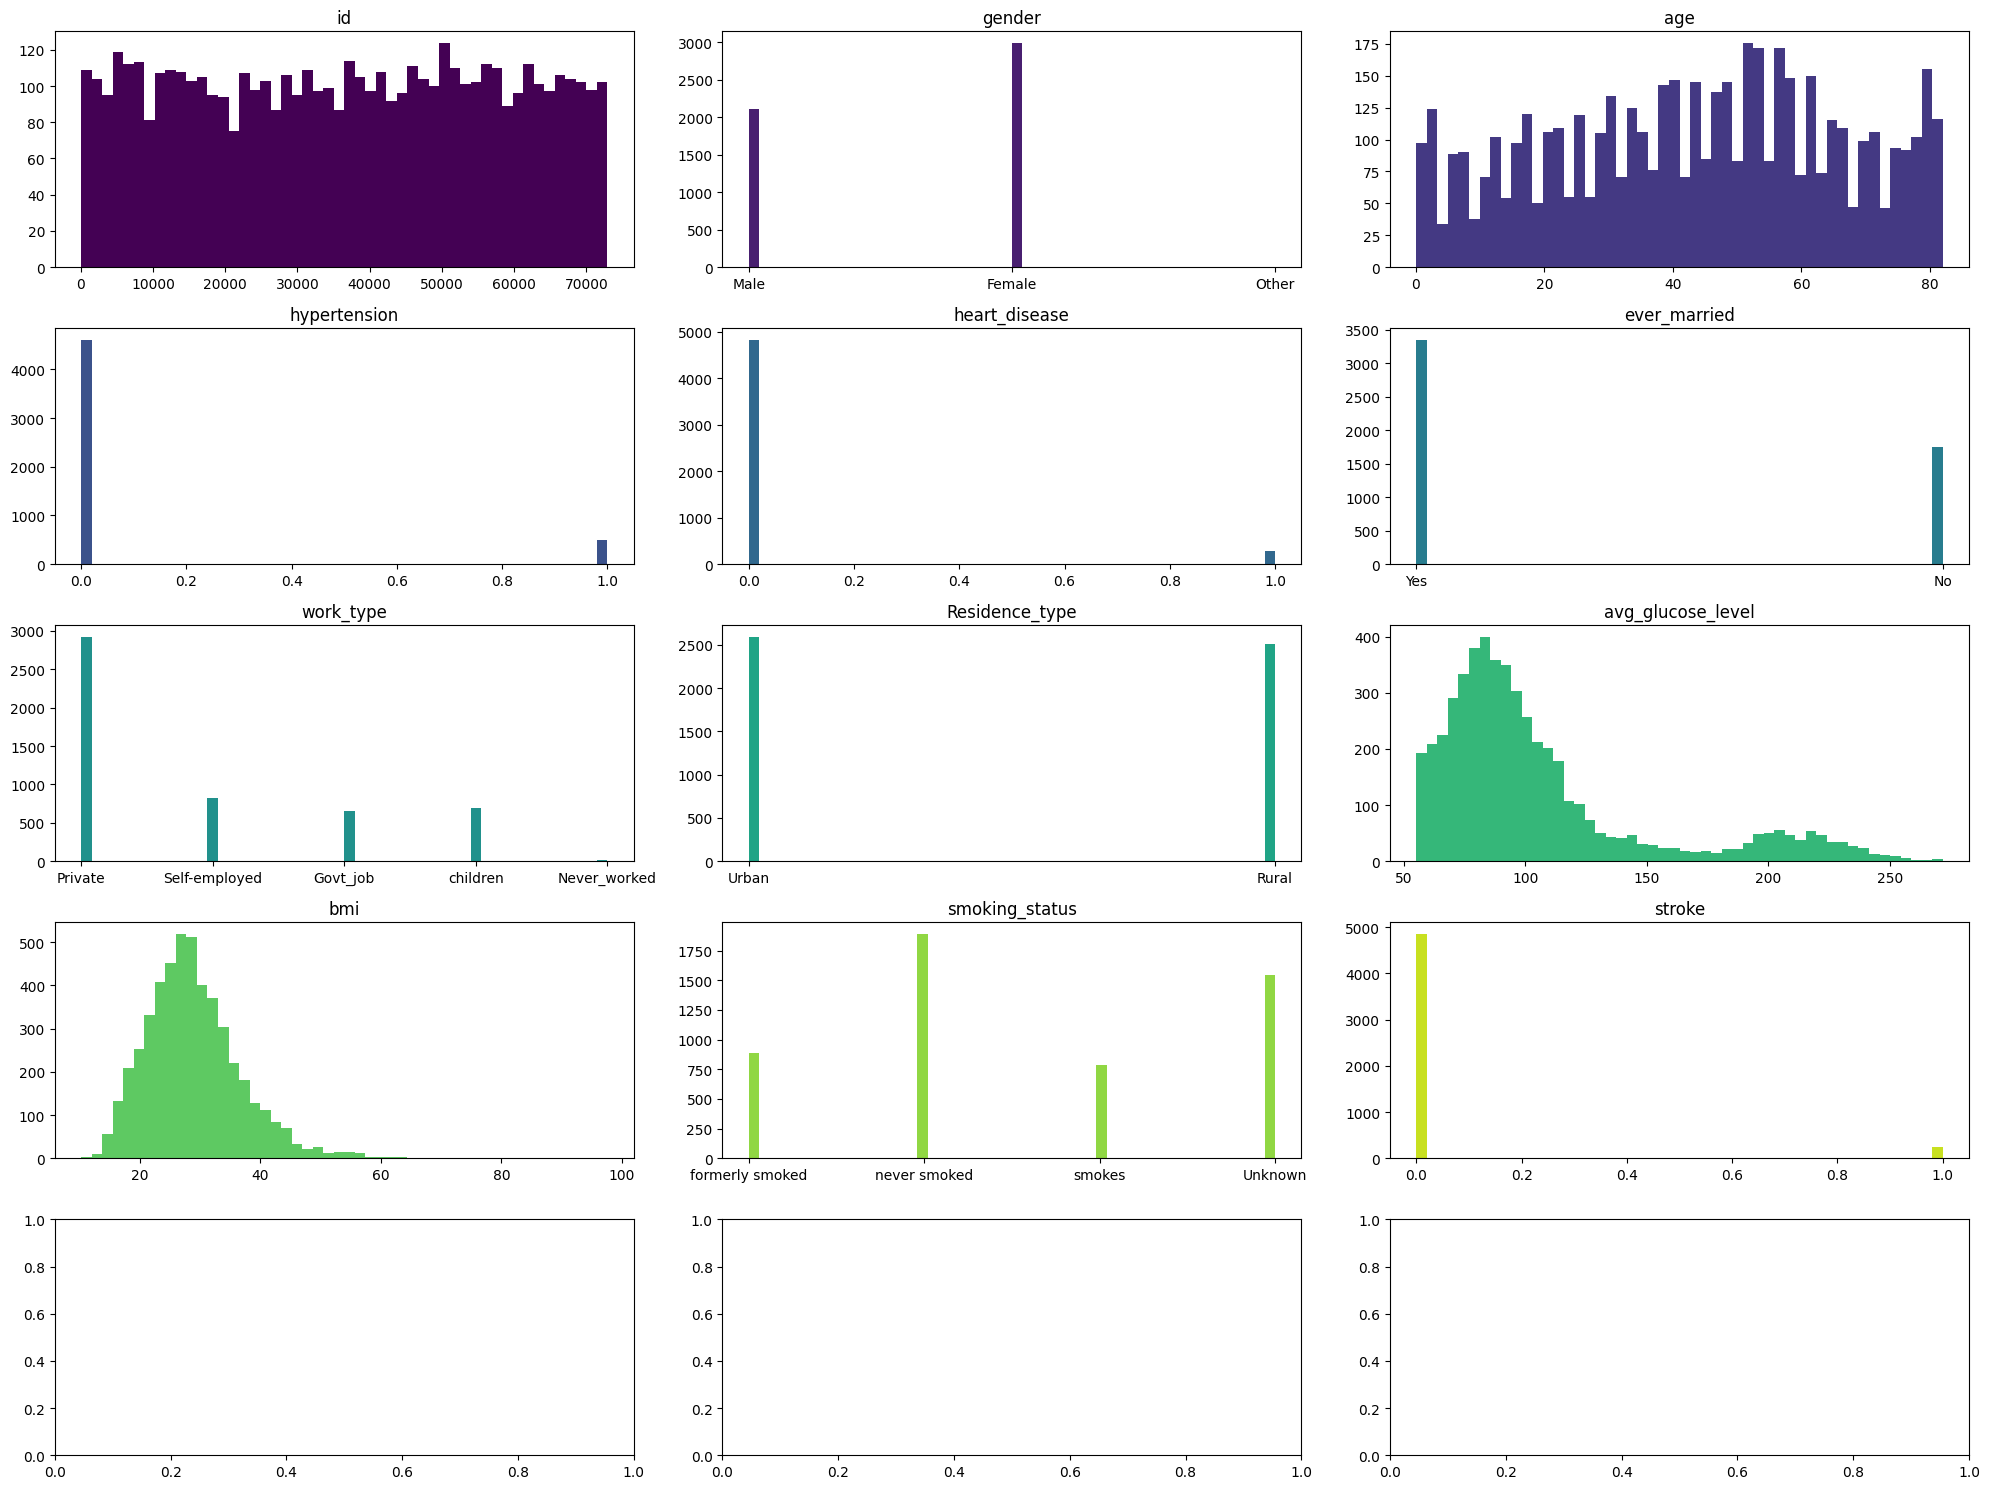

In [ ]:
bins = 50

cmap = plt.cm.viridis

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 15))

axes = axes.flatten()

for i, column in enumerate(stroke_prediction.columns):
    axes[i].hist(stroke_prediction[column], bins=bins, color=cmap(i / len(stroke_prediction.columns)))
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

### **Univariate Analysis**

In [ ]:
stroke_prediction.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<ipython-input-9-2ab5553c58f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=stroke_prediction['bmi'], palette='viridis')


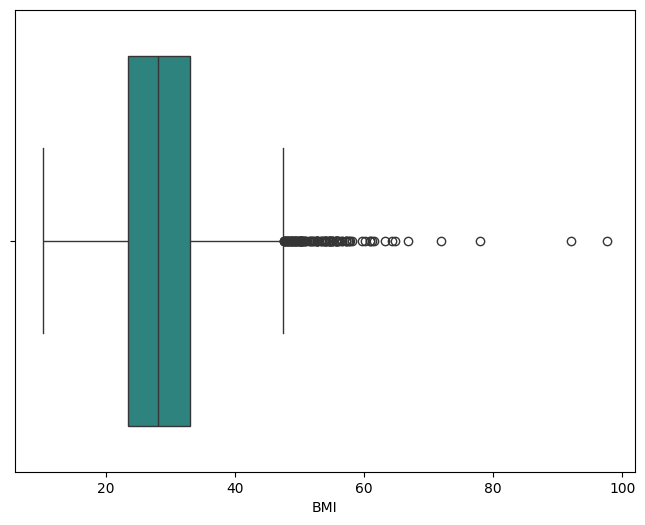

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=stroke_prediction['bmi'], palette='viridis')
plt.xlabel('BMI')
plt.show()

<ipython-input-10-bf258ad7fc22>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=stroke_prediction['avg_glucose_level'], palette='viridis')


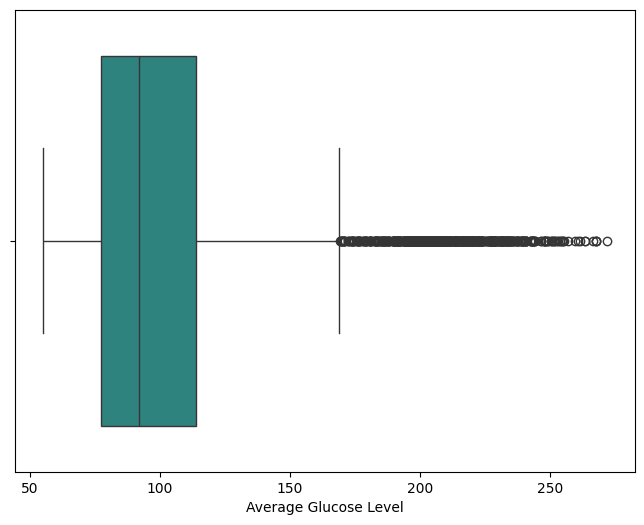

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=stroke_prediction['avg_glucose_level'], palette='viridis')
plt.xlabel('Average Glucose Level')
plt.show()

Membagi dataset menjadi 2 fitur, yaitu _Categorical_ dan _Numerical_

In [ ]:
data_numerical = ['age','avg_glucose_level','bmi']
data_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status', 'stroke']

#### **Categorical Features**

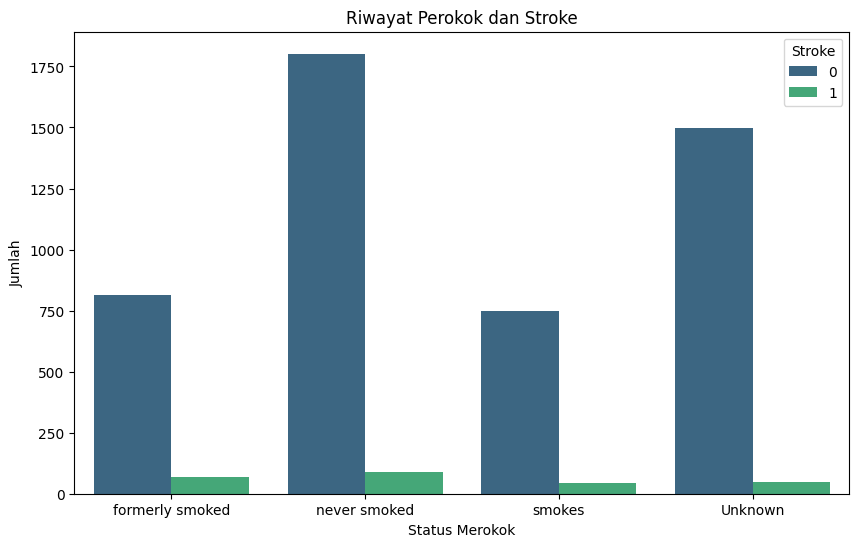

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=stroke_prediction, x='smoking_status', hue='stroke', palette='viridis')
plt.title('Riwayat Perokok dan Stroke')
plt.xlabel('Status Merokok')
plt.ylabel('Jumlah')
plt.legend(title='Stroke', loc='upper right')
plt.show()

_Plot_ diatas memberikan gambaran bahwa status merokok seseorang dapat berhubungan dengan kejadian stroke, namun jumlah kejadian stroke tertinggi justru ditemukan pada individu yang tidak pernah merokok. Hal ini mungkin disebabkan oleh faktor lain yang tidak terlihat dalam data, atau bisa juga menunjukkan bahwa ada variabel perancu (_confounding variables_) yang mempengaruhi hubungan antara merokok dan stroke.

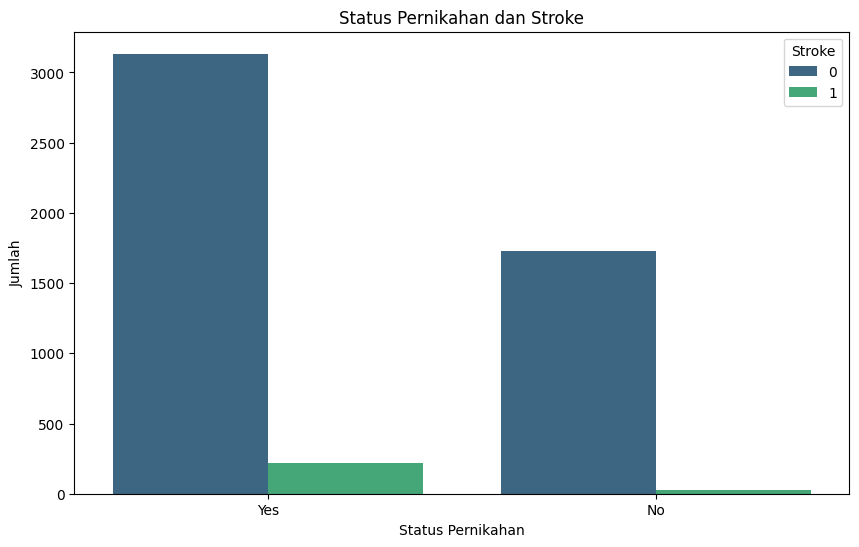

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=stroke_prediction, x='ever_married', hue='stroke', palette='viridis')
plt.title('Status Pernikahan dan Stroke')
plt.xlabel('Status Pernikahan')
plt.ylabel('Jumlah')
plt.legend(title='Stroke', loc='upper right')
plt.show()

_Plot_ diatas memberikan gambaran bahwa status status perkawinan seseorang dapat berhubungan dengan kejadian stroke, yang dimana seseorang yang sudah menikah cenderung memiliki penyakit stroke dibanding yang belum menikah.

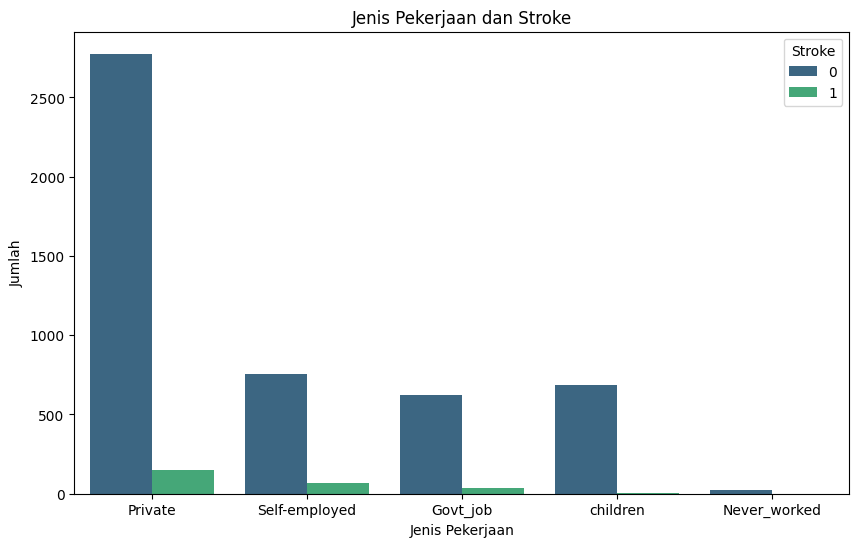

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=stroke_prediction, x='work_type', hue='stroke', palette='viridis')
plt.title('Jenis Pekerjaan dan Stroke')
plt.xlabel('Jenis Pekerjaan')
plt.ylabel('Jumlah')
plt.legend(title='Stroke', loc='upper right')
plt.show()

_Plot_ diatas memberikan gambaran bahwa jenis pekerjaan seseorang dapat berhubungan dengan kejadian stroke. Jumlah kejadian stroke tertinggi ditemukan pada **individu yang bekerja di sektor swasta (private)**, diikuti oleh mereka yang bekerja sendiri, dan kemudian mereka yang bekerja di sektor pemerintah. Jumlah kejadian stroke pada anak-anak sangat rendah, yang bisa diharapkan mengingat prevalensi stroke pada usia muda umumnya lebih rendah dibandingkan dengan orang dewasa.

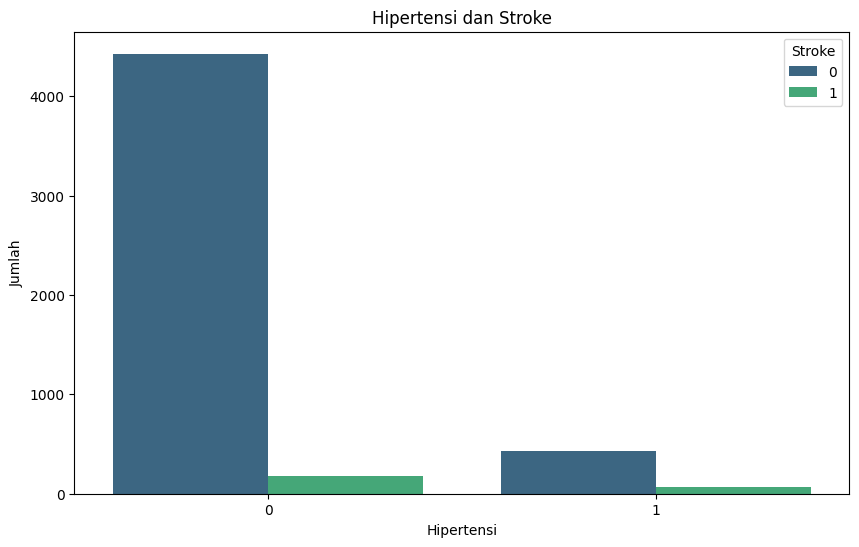

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=stroke_prediction, x='hypertension', hue='stroke', palette='viridis')
plt.title('Hipertensi dan Stroke')
plt.xlabel('Hipertensi')
plt.ylabel('Jumlah')
plt.legend(title='Stroke', loc='upper right')

_Plot_ ini memberikan gambaran bahwa meskipun hipertensi dikenal sebagai faktor risiko utama untuk stroke, jumlah kejadian stroke lebih banyak ditemukan pada individu yang tidak memiliki hipertensi.

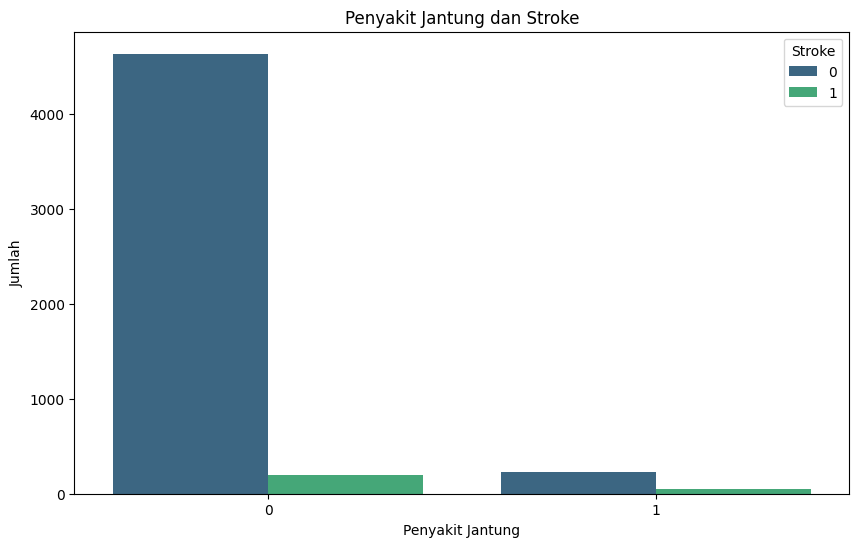

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=stroke_prediction, x='heart_disease', hue='stroke', palette='viridis')
plt.title('Penyakit Jantung dan Stroke')
plt.xlabel('Penyakit Jantung')
plt.ylabel('Jumlah')
plt.legend(title='Stroke', loc='upper right')
plt.show()


_Plot_ diatas menunjukkan bahwa lebih banyak kejadian stroke ditemukan pada individu yang tidak memiliki penyakit jantung dibandingkan dengan mereka yang memiliki penyakit jantung. Meskipun penyakit jantung adalah faktor risiko untuk stroke.

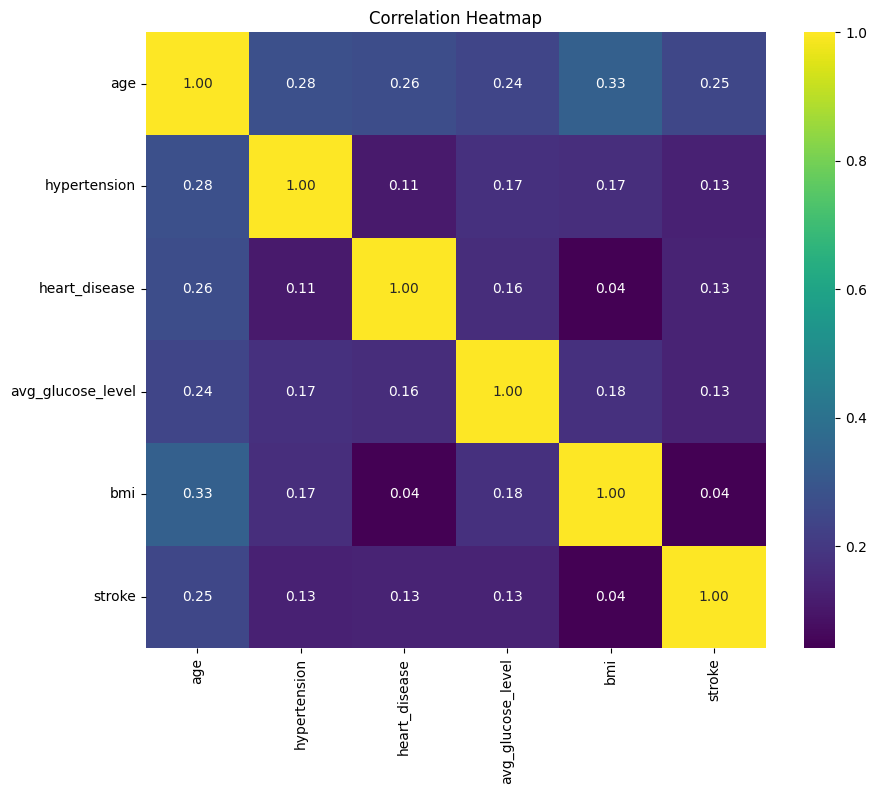

In [ ]:
variables = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

correlation_matrix = stroke_prediction[variables].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

**Hasil Pengamatan**:

Pengamatan:

1) Tidak ada korelasi yang kuat antar fitur.

2) Korelasi tertinggi dapat diamati antara indeks massa tubuh (_BMI_) dan usia.

3) Korelasi terendah dapat diamati antara heart_disease dan hyper_tension (patut dipertanyakan).

##### **Analysis of Categorical Variables**

<ipython-input-18-b5e066ee8760>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_categorical, x=val, palette='viridis', ax=ax)
<ipython-input-18-b5e066ee8760>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_categorical, x=val, palette='viridis', ax=ax)
<ipython-input-18-b5e066ee8760>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_categorical, x=val, palette='viridis', ax=ax)
<ipython-input-18-b5e066ee8760>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

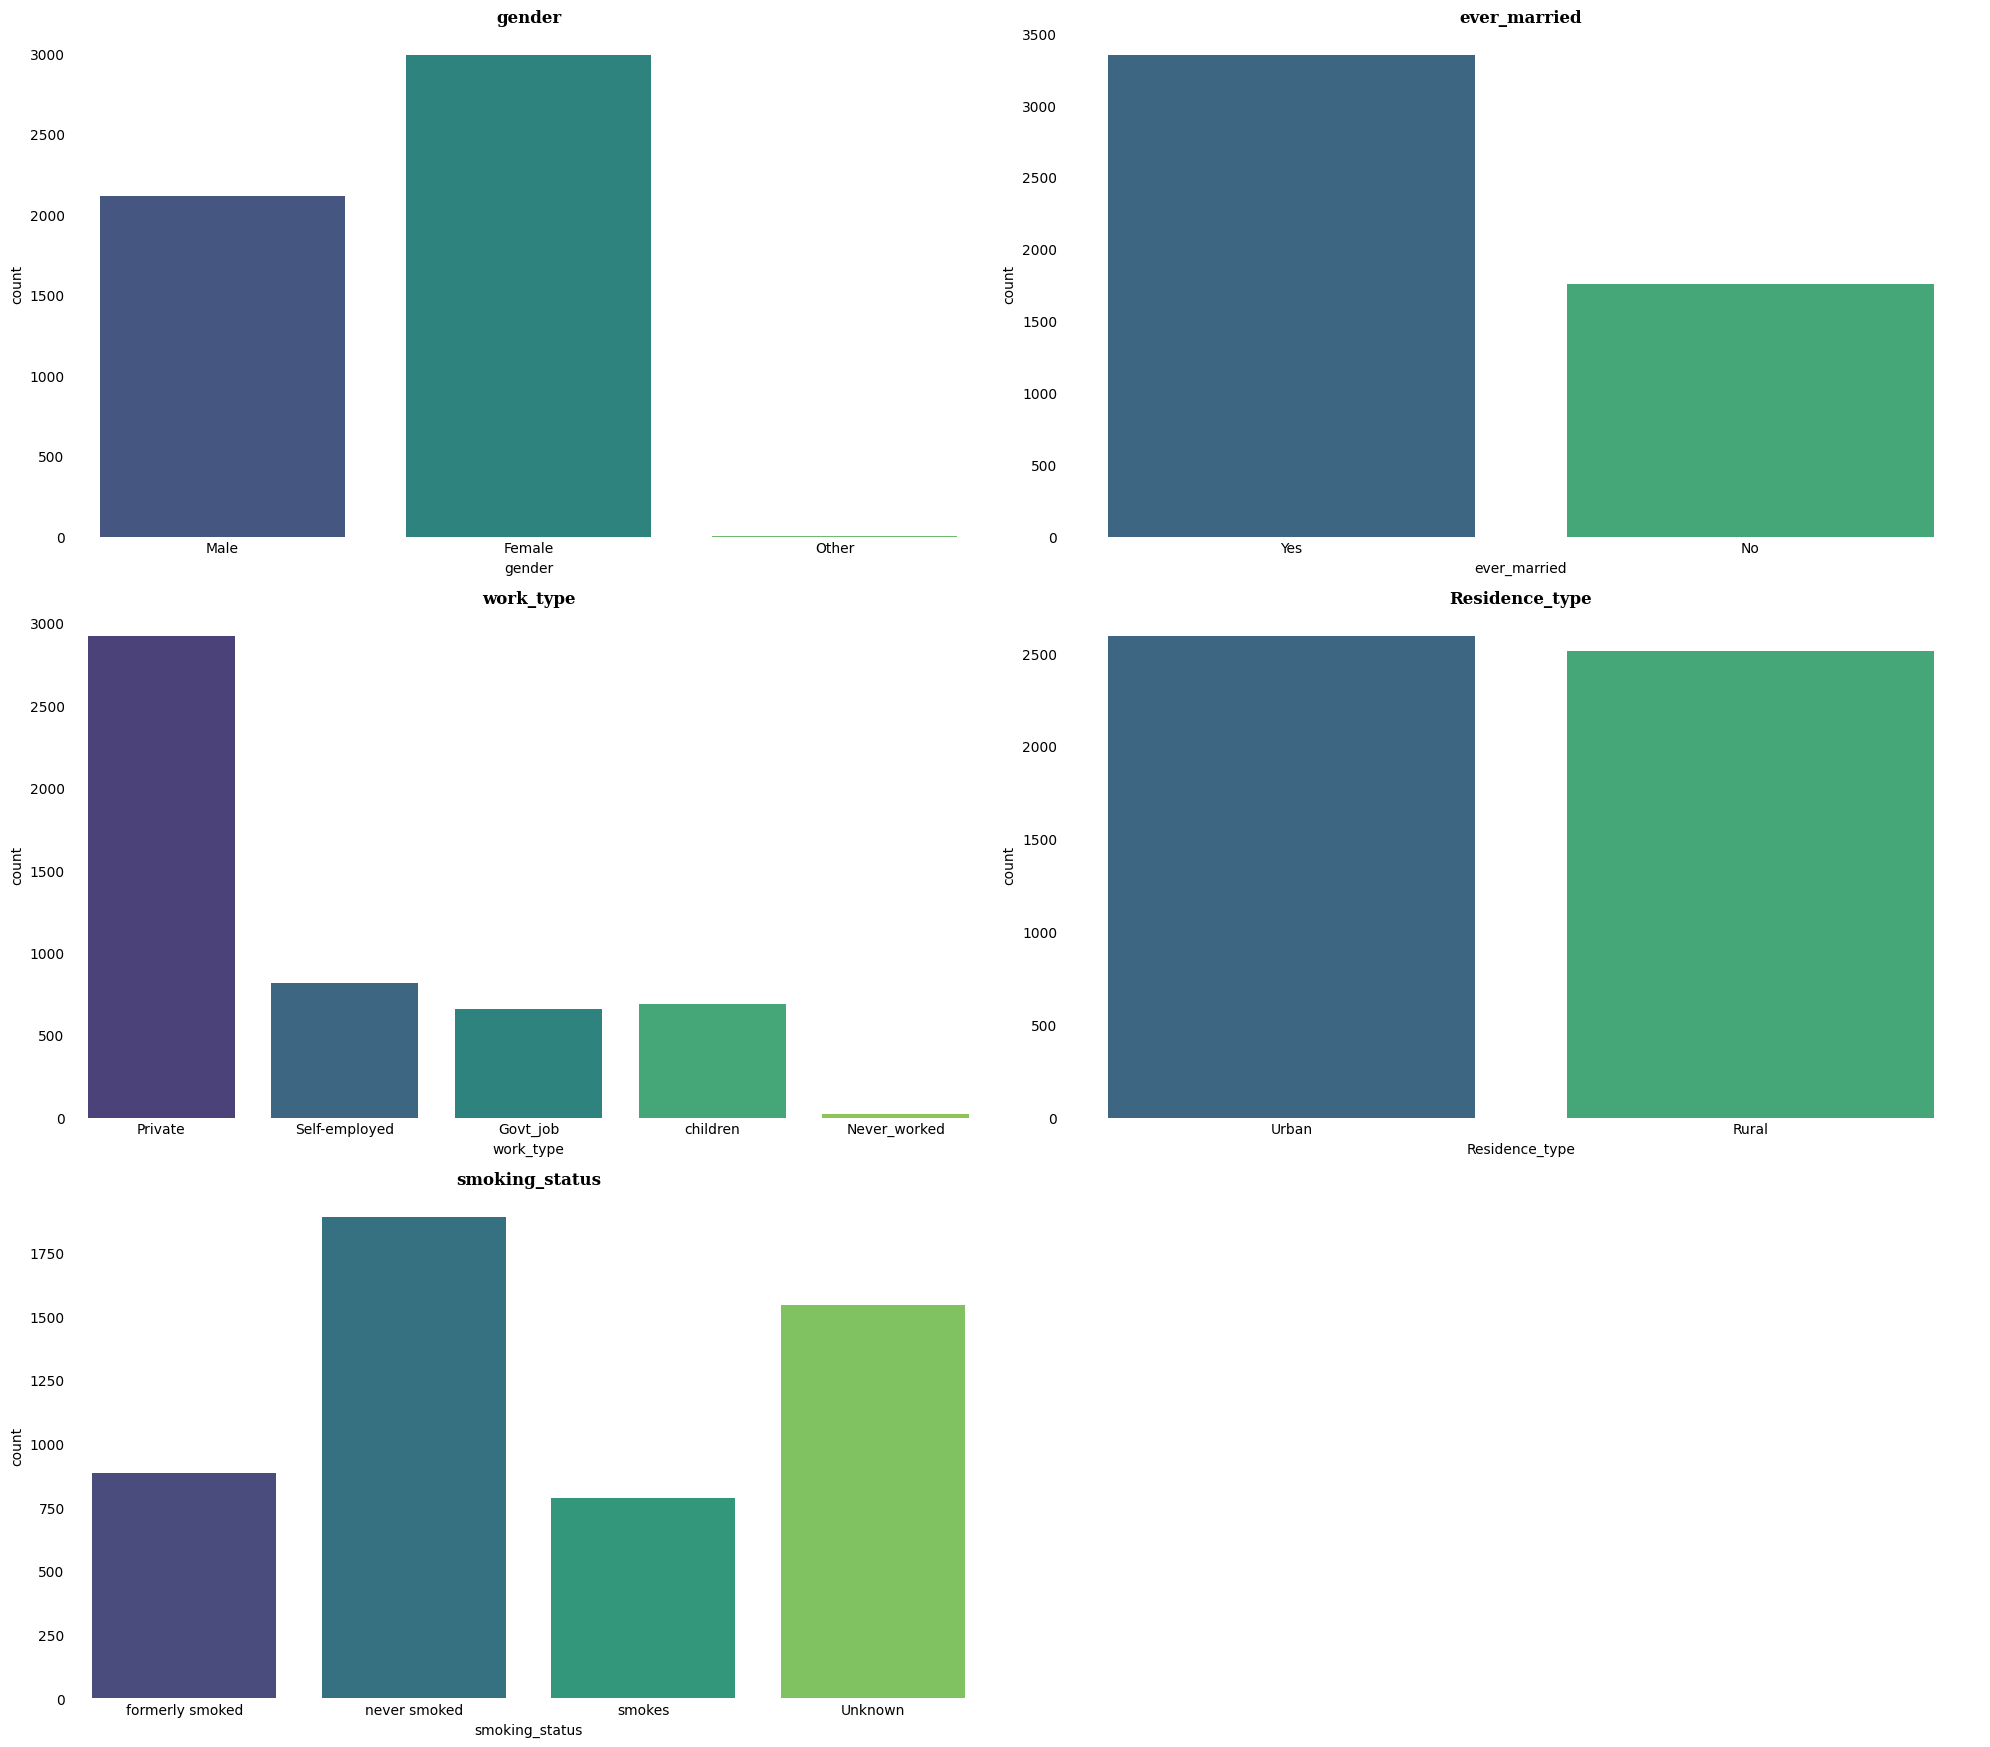

In [ ]:
data_categorical = stroke_prediction.select_dtypes(include=['object', 'category'])

fig = plt.figure(figsize=(20, 23))

for indx, val in enumerate(data_categorical.columns):
    ax = plt.subplot(4, 2, indx + 1)
    ax.set_title(val, fontweight='bold', fontfamily='serif')
    for i in ['top', 'right', 'bottom', 'left']:
        ax.spines[i].set_visible(False)
    ax.tick_params(axis='both', which='both', length=0)
    sns.countplot(data=data_categorical, x=val, palette='viridis', ax=ax)

plt.tight_layout()
plt.show()

Hasil Pengamatan:

1) Jumlah perempuan lebih banyak daripada laki-laki dalam penyakit stroke.

2) Jumlah orang yang sudah menikah jauh lebih banyak menderika penyakit stroke daripada yang belum menikah (masuk akal karena distribusinya antara 0 dan 60)

3) Jumlah yang bekerja di perusahaan swasta memiliki penyakit stroke terbanyak.

4) Tidak ada perbedaan antara populasi di daerah perkotaan dan pedesaan.

5) Jumlah orang yang tidak merokok memiliki penyakit stroke terbanyak.

#### **Numerical Features**

Melihat histogram masing-masing numerical yaitu _`age`_ ,_`avg_glucose_level`_,  dan _`bmi`_.


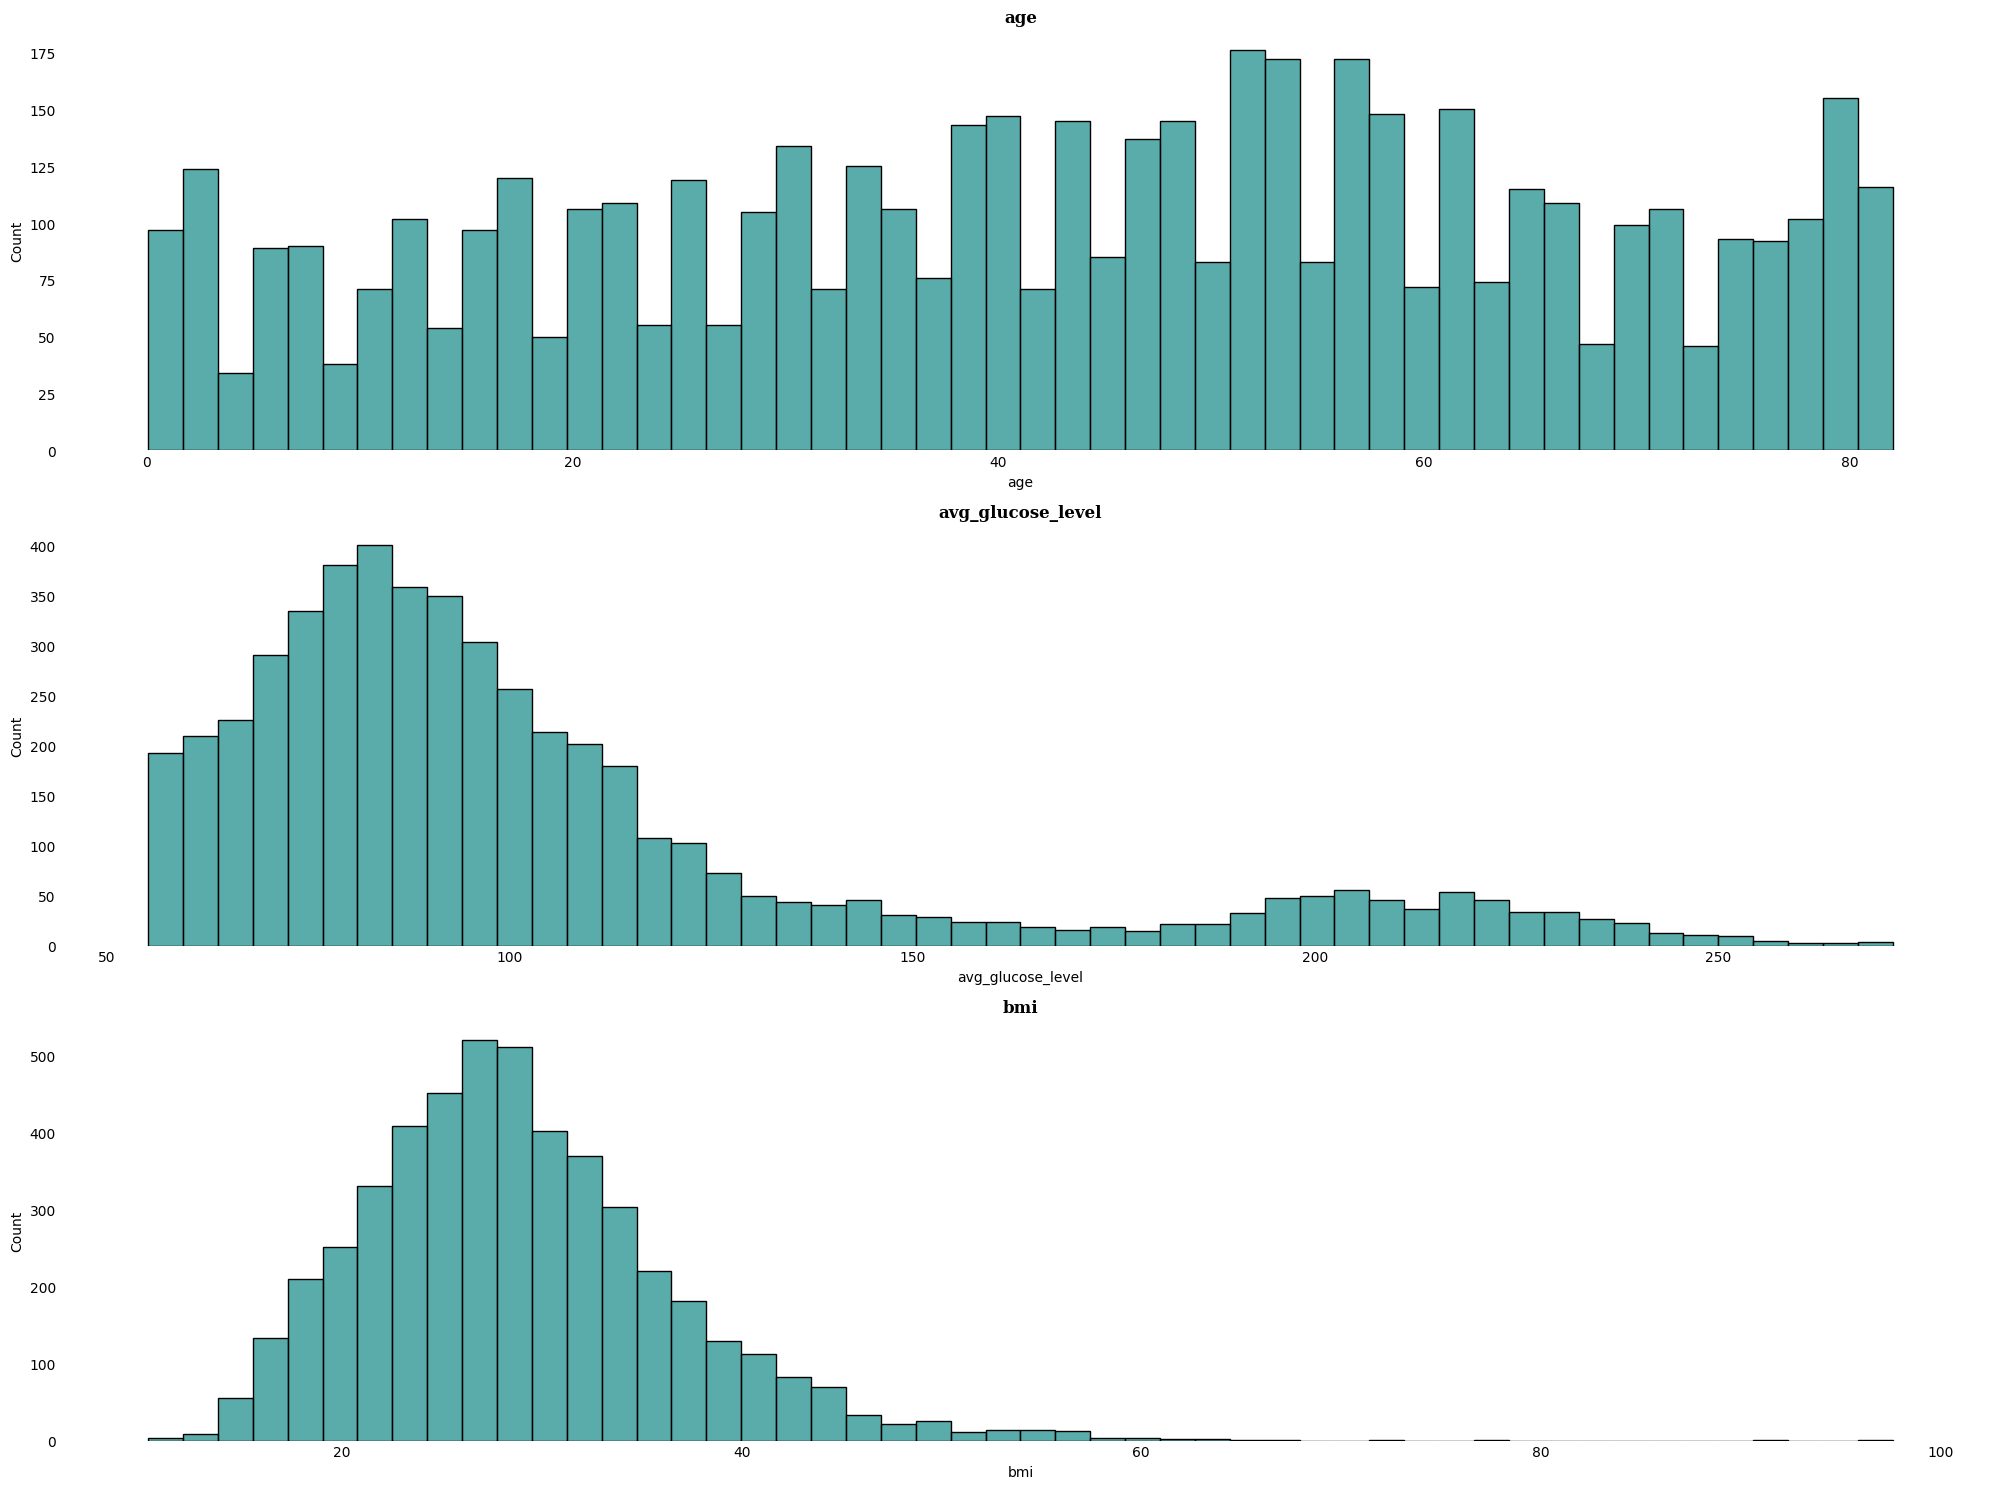

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(20, 15))

columns = ['age', 'avg_glucose_level', 'bmi']

for ax, col in zip(axes, columns):
    sns.histplot(stroke_prediction[col], bins=50, kde=False, color=sns.color_palette('viridis', 1)[0], ax=ax)
    ax.set_title(col, fontweight='bold', fontfamily='serif')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.grid(False)
    ax.tick_params(axis='both', which='both', length=0)

plt.tight_layout()
plt.show()

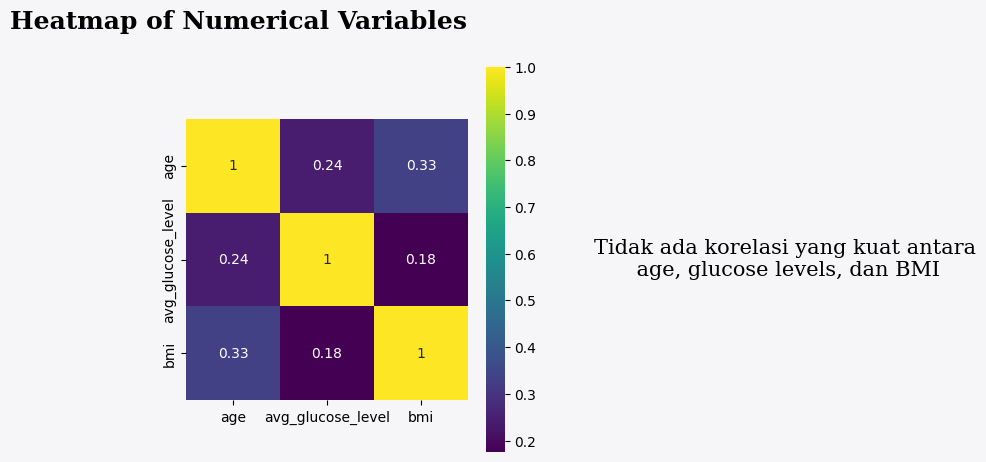

In [ ]:
fig = plt.figure(figsize=(10, 5), dpi=100)
gs = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
axes = [ax0, ax1]

background_color = '#f6f5f7'
for ax in axes:
    ax.set_facecolor(background_color)

fig.patch.set_facecolor(background_color)

corrmat = stroke_prediction[data_numerical].corr()
sns.heatmap(ax=ax0, data=corrmat, annot=True, cmap="viridis", square=True)
ax1.text(0.5, 0.5, 'Tidak ada korelasi yang kuat antara\n age, glucose levels, dan BMI', horizontalalignment='center', verticalalignment='center', fontsize=15, fontfamily='serif')
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.tick_params(left=False, bottom=False)
for spine in ["top", "right", "bottom", "left"]:
    ax1.spines[spine].set_visible(False)

plt.text(-1.7, 1.1, 'Heatmap of Numerical Variables', fontsize=18, fontweight='bold', fontfamily='serif')

plt.show()

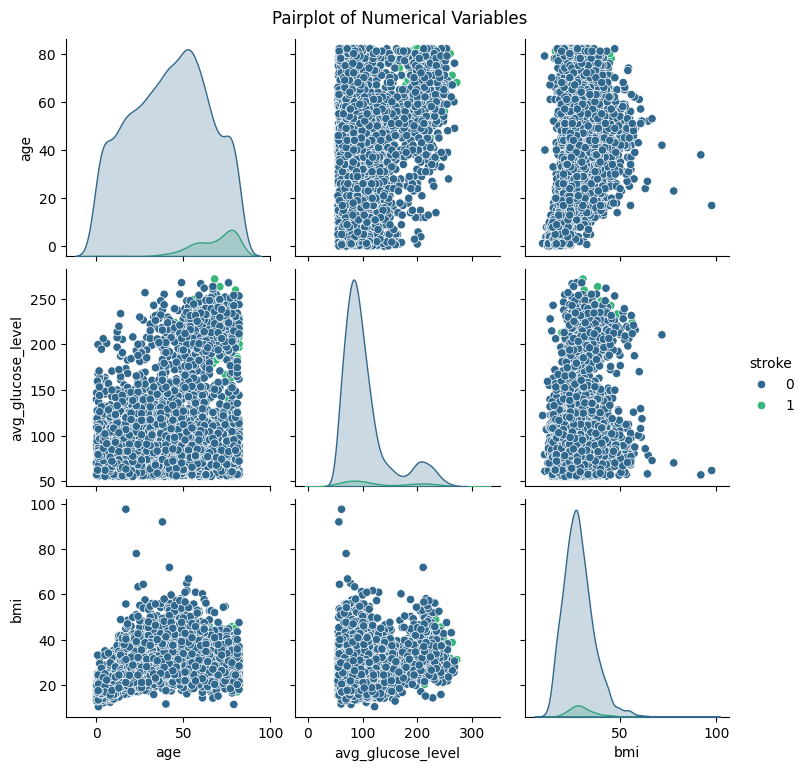

In [ ]:
data_numerical = stroke_prediction[['age', 'avg_glucose_level', 'bmi', 'stroke']]

sns.pairplot(data_numerical, hue='stroke', palette='viridis')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

## **Data Preparation**

### **Penangan Missing Value**

In [ ]:
def draw_missing_data_table(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

print(draw_missing_data_table(stroke_prediction))

                   Total   Percent
bmi                  201  0.039335
id                     0  0.000000
gender                 0  0.000000
age                    0  0.000000
hypertension           0  0.000000
heart_disease          0  0.000000
ever_married           0  0.000000
work_type              0  0.000000
Residence_type         0  0.000000
avg_glucose_level      0  0.000000
smoking_status         0  0.000000
stroke                 0  0.000000


In [ ]:
data=stroke_prediction.fillna(np.mean(stroke_prediction['bmi']))

Terdapat **201 _data missing_** di _bmi_ dan setelah itu memasukkan _data missing_ tersebut dengan _**mean**_.

In [ ]:
stroke_prediction.shape

(5110, 12)

### **Penanganan Outlier**

Menangani _Outlier_: melakukan pengecekan apakah data _stroke prediction_ memiliki _data outlie_r. Apabila terdapat _data outlier_, maka akan dihapus. Untuk mengetahui _data outlier_ yang dimiliki oleh s_troke prediction dataset_, maka digunakanlah _boxplot_ yang memperlihatkan langsung keseluruhan _dataset_. Dapat dilihat bahwa terdapat beberapa _outlier_, khususnya pada fitur BMI yang memiliki _outlier_ paling banyak.

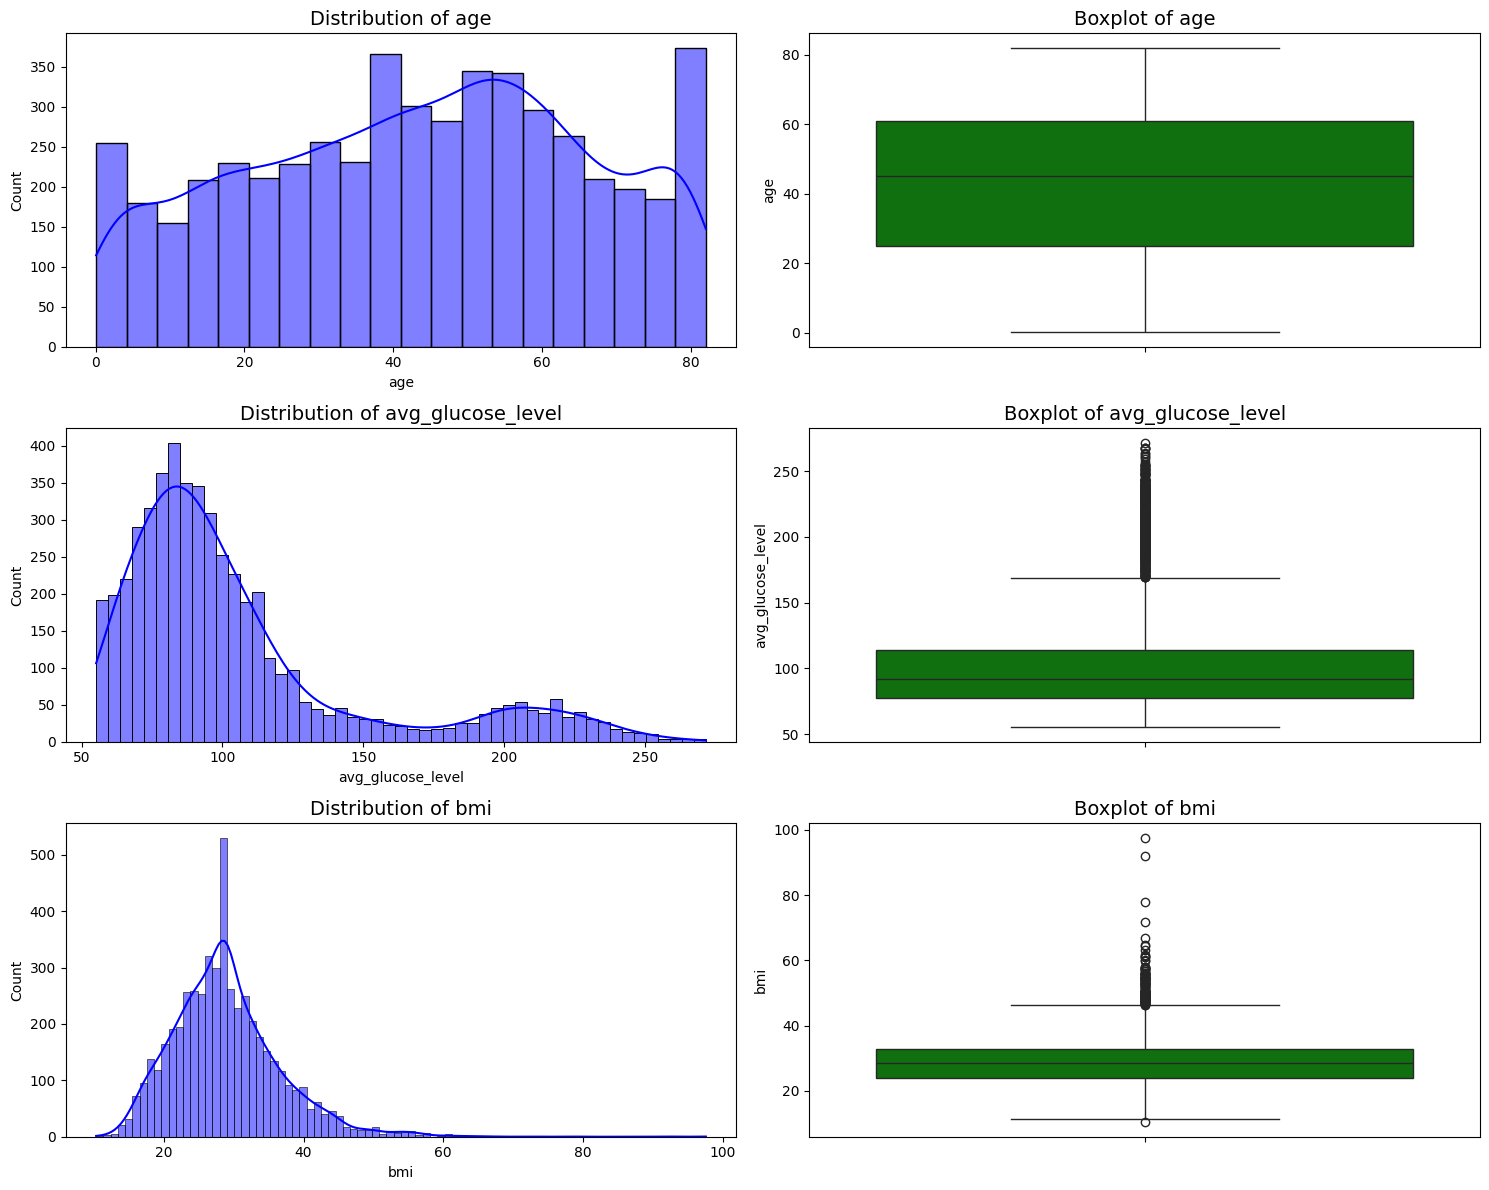

In [ ]:
def draw_missing_data_table(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

stroke_prediction['bmi'].fillna(stroke_prediction['bmi'].mean(), inplace=True)

numerical_columns = ['age', 'avg_glucose_level', 'bmi']

fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(15, 12))

for i, col in enumerate(numerical_columns):
    sns.histplot(stroke_prediction[col], kde=True, ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f'Distribution of {col}', fontsize=14)
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Count')

    sns.boxplot(data=stroke_prediction, y=col, ax=axes[i, 1], color='green')
    axes[i, 1].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i, 1].set_ylabel(col)

plt.tight_layout()
plt.show()

<Axes: >

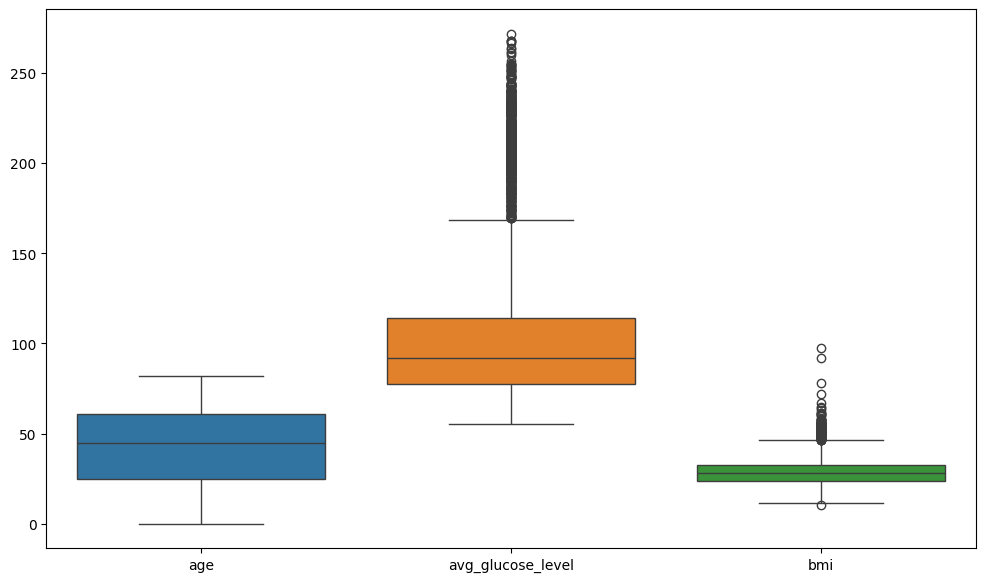

In [ ]:
plt.figure(figsize = (12, 7))
sns.boxplot(data = stroke_prediction[['age', 'avg_glucose_level', 'bmi']])

_IQR_ bertujuan untuk mengapuskan _outlier_ yang ada. Hasil akhir data dari _outlie_r yang telah dihapuskan dapat dilihat dengan _`shape`_.

In [ ]:
hd_outlier = stroke_prediction[['age', 'avg_glucose_level', 'bmi']]
Q1 = hd_outlier.quantile(0.25)
Q3 = hd_outlier.quantile(0.75)

IQR = Q3 - Q1

outlier = hd_outlier[~((hd_outlier<(Q1-1.5*IQR))|(hd_outlier>(Q3+1.5*IQR))).any(axis=1)]

Setelah menangani outlier dengan _IQR_, maka didapatkan _`shape`_ sebagai berikut:

In [ ]:
outlier.shape

(4391, 3)

### **Melakukan Label Encoder**

Melakukan _Label Encoder_: Melakukan proses _encoding_ terhadap _`categorical_feature`_

_LabelEncoder()_ dilakukan terhadap fitur-fitur _categorical_

In [ ]:
from sklearn.preprocessing import LabelEncoder

gender_label = LabelEncoder()
ever_married_label = LabelEncoder()
work_type_label = LabelEncoder()
Residence_type_label = LabelEncoder()
smoking_status_label = LabelEncoder()

stroke_prediction['gender'] = gender_label.fit_transform(stroke_prediction['gender'])
stroke_prediction['ever_married'] = ever_married_label.fit_transform(stroke_prediction['ever_married'])
stroke_prediction['work_type'] = work_type_label.fit_transform(stroke_prediction['work_type'])
stroke_prediction['Residence_type'] = Residence_type_label.fit_transform(stroke_prediction['Residence_type'])
stroke_prediction['smoking_status'] = smoking_status_label.fit_transform(stroke_prediction['smoking_status'])

In [ ]:
stroke_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


<Axes: >

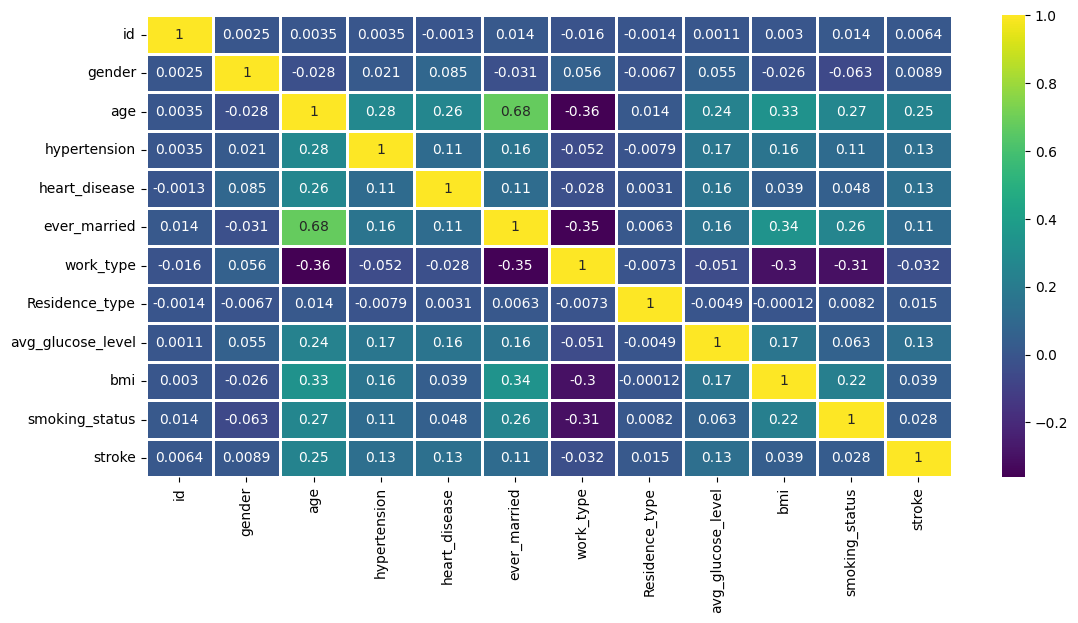

In [ ]:
fig , ax = plt.subplots(figsize=(13,6))
sns.heatmap(stroke_prediction.corr(), cmap="viridis", linecolor='white' , annot=True , linewidths=1 , ax=ax )

### **Splitting Data**

Memisahkan fitur dan target kemudian membagi data menjadi _train_ dan _test_ dengan perbandingan 80% dan 20%. Pembagian ini cukup ideal untuk _dataset_ yang terbilang kecil.

In [ ]:
from sklearn.model_selection import train_test_split

X = stroke_prediction.drop(columns=['stroke'])
Y = stroke_prediction['stroke']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 21)

print('Shape dari Xtrain', Xtrain.shape)
print('Shape dari Xest', Xtest.shape)

Shape dari Xtrain (4088, 11)
Shape dari Xest (1022, 11)


### **Standarisasi**

Standarisasi membantu untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma.Untuk menghindari kebocoran informasi pada data uji menerapkan fitur standarisasi pada data latih. Kemudian, pada tahap evaluasi melakukan standarisasi pada data uji.

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X)

Xtrain = std_scaler.transform(Xtrain)
Xtest = std_scaler.transform(Xtest)

Xtrain = pd.DataFrame(Xtrain, columns=X.columns)
Xtest = pd.DataFrame(Xtest, columns=X.columns)

## **Modelling**

Proses _modeling_ yang dilakukan menggunakan 3 algoritma dan mencari performa yang paling baik di antara ketiganya.

In [ ]:
model = pd.DataFrame( index = ['train_mse', 'test_mse'],
                      columns = ['KNN', 'AdaBoost', 'RandomForest'])

**K-Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(Xtrain, ytrain)

model.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(Xtrain), y_true=ytrain)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=100, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(Xtrain, ytrain)

model.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(Xtrain), y_true=ytrain)

**Boosting Algorithm**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.2, random_state=55)
boosting.fit(Xtrain, ytrain)
model.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(Xtrain), y_true=ytrain)

**Evaluasi Model**

Evaluasi metrik yang digunakan untuk mengukur kinerja model adalah metrik MSE (_Mean Squared Error_). Pemilihan matrik ini disebabkan karena kasus atau domain proyek yang dipilih adalah klasifikasi. Matrik MSE, pada dasarnya akan mengukur kuadrat rerata error dari prediksi yang dilakukan. MSE juga akan menghitung selisih kuadrat antara prediksi dan target, yang kemudian melakukan perhitungan rata-rata terhadap nilai-nilai tersebut.

Semakin tinggi nilai yang diperoleh MSE, semakin buruk juga modelnya. Nilai MSE tidak pernah negatif, tetapi akan menjadi NOL untuk model yang sempurna.

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'AdaBoost', 'RandomForest'])

model_dict = {'KNN': knn, 'AdaBoost': RF, 'RandomForest': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=ytrain, y_pred=model.predict(Xtrain))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=ytest, y_pred=model.predict(Xtest))/1e3

mse

,train,test
KNN,0.000039,0.000048
AdaBoost,0.000007,0.000046
RandomForest,0.000056,0.000063


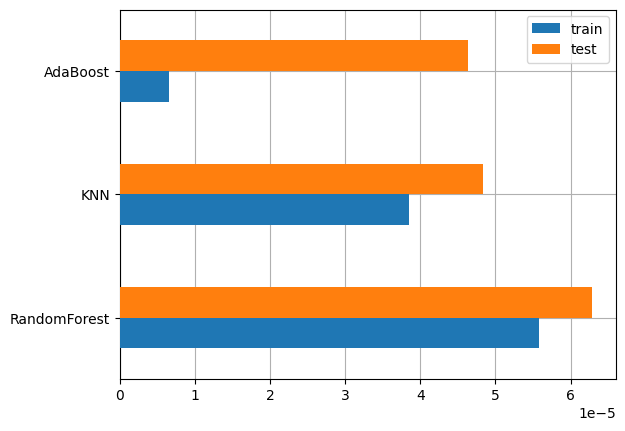

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari _plot_ yang disajikan di atas, dapat diketahui bahwa model _AdaBoost_ memberikan nilai _error_ yang paling kecil. Sehingga, model AdaBoost lah yang dipilih sebagai model terbaik untuk melakukan klasifikasi penyakit stroke.

In [ ]:
prediksi = Xtest.iloc[:10].copy()
pred_dict = {'y_true':ytest[:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_AdaBoost,prediksi_RandomForest
32,1,0.2,0.2,0.4
4187,0,0.0,0.0,0.1
1812,0,0.0,0.0,0.0
4315,0,0.0,0.0,0.0
2478,0,0.0,0.0,0.0
4568,0,0.0,0.0,0.0
2234,0,0.0,0.0,0.0
4472,0,0.0,0.0,0.0
38,1,0.0,0.0,0.2
1199,0,0.1,0.0,0.2


Dari tabel yang diatas dapat dilihat bahwa prediksi menggunakan _AdaBoost_, memiliki hasil paling sesuai dengan data aslinya _y_true_, dibandingkan kedua model lainnya. Hasil prediksi yang diberikan oleh model _AdaBoost_ adalah benar, dibandingkan dengan prediksi _KNN_ dan _RandomForest_. Maka dapat diketahui bahwa model AdaBoost memberikan nilai _error_ yang paling kecil. Sehingga, model _AdaBoost_ lah yang dipilih sebagai model terbaik untuk melakukan klasifikasi penyakit stroke. Dan melihat dari keberhasilan prediksi menggunakan AdaBoost maka proyek ini mampu dan berhasil menyelesaikan Goals yang diinginkan.

Referensi:

[1] E. Dritsas and M. Trigka, “Stroke risk prediction with machine learning techniques,” Sensors, vol. 22, no. 13, p. 4670, Jun. 2022. doi:10.3390/s22134670

[2] Fedesoriano, “Stroke prediction dataset,” Kaggle, https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset.